In [91]:
import pandas as pd
import geopandas as gp

In [92]:
hu_2011 = pd.read_csv('E:/Transit-Casa-Alex/Output/Housing Inventory/' + str(2011) + '/' + str(2011) + '_HU_Changes.csv')
hu_2012 = pd.read_csv('E:/Transit-Casa-Alex/Output/Housing Inventory/' + str(2012) + '/' + str(2012) + '_HU_Changes.csv')
hu_2013 = pd.read_csv('E:/Transit-Casa-Alex/Output/Housing Inventory/' + str(2013) + '/' + str(2013) + '_HU_Changes.csv')
hu_2014 = pd.read_csv('E:/Transit-Casa-Alex/Output/Housing Inventory/' + str(2014) + '/' + str(2014) + '_HU_Changes.csv')
hu_2015 = pd.read_csv('E:/Transit-Casa-Alex/Output/Housing Inventory/' + str(2015) + '/' + str(2015) + '_HU_Changes.csv')

In [93]:
hu_2011.head()

,Unnamed: 0,GEOID10,NETUNITS,geometry
0,0,60750101001000,NaN,"POLYGON ((-122.419942 37.809021, -122.419948 3..."
1,1,60750101001001,NaN,"POLYGON ((-122.419942 37.809021, -122.419938 3..."
2,2,60750101001002,NaN,"POLYGON ((-122.405659 37.806674, -122.405974 3..."
3,3,60750101001003,NaN,"POLYGON ((-122.407304 37.807379, -122.407548 3..."
4,4,60750101001004,NaN,"POLYGON ((-122.412524 37.808625, -122.414164 3..."


In [94]:
hu_2012.head()

,Unnamed: 0,GEOID10,NETUNITS,geometry
0,0,60750101001000,NaN,"POLYGON ((-122.419942 37.809021, -122.419948 3..."
1,1,60750101001001,NaN,"POLYGON ((-122.419942 37.809021, -122.419938 3..."
2,2,60750101001002,NaN,"POLYGON ((-122.405659 37.806674, -122.405974 3..."
3,3,60750101001003,NaN,"POLYGON ((-122.407304 37.807379, -122.407548 3..."
4,4,60750101001004,NaN,"POLYGON ((-122.412524 37.808625, -122.414164 3..."


In [95]:
len(hu_2012)

7386

In [96]:
len(hu_2012.GEOID10.unique())

7386

In [97]:
change = hu_2011.merge(hu_2012[['NETUNITS','GEOID10']],on = 'GEOID10', suffixes = ('_11','_12')).merge(hu_2013[['NETUNITS','GEOID10']],on = 'GEOID10',suffixes = ('','_13')).merge(hu_2014[['NETUNITS','GEOID10']],on = 'GEOID10',suffixes = ('','_14')).merge(hu_2015[[' NETUNITS ','GEOID10']],on = 'GEOID10',suffixes = ('','_15'))

In [98]:
change = change.fillna(0)

In [99]:
change['NET_CHANGE'] = change['NETUNITS_11']+change['NETUNITS_12']+change['NETUNITS'] +change['NETUNITS_14']+change[' NETUNITS ']

In [100]:
change.columns

Index(['Unnamed: 0', 'GEOID10', 'NETUNITS_11', 'geometry', 'NETUNITS_12',
       'NETUNITS', 'NETUNITS_14', ' NETUNITS ', 'NET_CHANGE'],
      dtype='object')

In [120]:
len(hu_2011.NETUNITS.unique()) + len(hu_2012.NETUNITS.unique()) + len(hu_2013.NETUNITS.unique()) + len(hu_2014.NETUNITS.unique()) + len(hu_2015[' NETUNITS '].unique())

171

In [121]:
# could be changes within the same census block, this looks reasonable
len(change.NET_CHANGE.unique())

96

In [122]:
change.head(20)

,Unnamed: 0,GEOID10,NETUNITS_11,geometry,NETUNITS_12,NETUNITS,NETUNITS_14,NETUNITS,NET_CHANGE
0,0,60750101001000,0.0,"POLYGON ((-122.419942 37.809021, -122.419948 3...",0.0,0.0,0.0,0.0,0.0
1,1,60750101001001,0.0,"POLYGON ((-122.419942 37.809021, -122.419938 3...",0.0,0.0,0.0,0.0,0.0
2,2,60750101001002,0.0,"POLYGON ((-122.405659 37.806674, -122.405974 3...",0.0,0.0,0.0,0.0,0.0
3,3,60750101001003,0.0,"POLYGON ((-122.407304 37.807379, -122.407548 3...",0.0,0.0,0.0,0.0,0.0
4,4,60750101001004,0.0,"POLYGON ((-122.412524 37.808625, -122.414164 3...",0.0,0.0,0.0,0.0,0.0
5,5,60750101001005,0.0,"POLYGON ((-122.419942 37.809021, -122.419803 3...",0.0,0.0,0.0,0.0,0.0
6,6,60750101001006,0.0,"POLYGON ((-122.415616 37.807276, -122.417261 3...",0.0,0.0,0.0,0.0,0.0
7,7,60750101001007,0.0,"POLYGON ((-122.419086 37.807803, -122.417665 3...",0.0,0.0,0.0,0.0,0.0
8,8,60750101001008,0.0,"POLYGON ((-122.40905 37.808111, -122.40921 37....",0.0,0.0,0.0,0.0,0.0
9,9,60750101001009,0.0,"POLYGON ((-122.410715 37.808286, -122.410516 3...",0.0,0.0,0.0,0.0,0.0


In [123]:
changes = change[['NET_CHANGE','GEOID10','geometry']]

In [124]:
changes.NET_CHANGE.value_counts()

 0.0      6623
 1.0       244
-1.0       241
 2.0        79
 3.0        26
-2.0        23
 4.0        17
 6.0         6
 5.0         6
 8.0         6
 7.0         4
 18.0        4
 63.0        3
 20.0        3
 11.0        3
-4.0         3
 19.0        3
 14.0        3
 70.0        3
 26.0        2
-18.0        2
 60.0        2
-8.0         2
 16.0        2
 10.0        2
 34.0        2
 41.0        2
 25.0        2
 17.0        1
 32.0        1
          ... 
 75.0        1
 105.0       1
 71.0        1
 311.0       1
 38.0        1
 88.0        1
 98.0        1
 100.0       1
 182.0       1
-19.0        1
 66.0        1
-21.0        1
 114.0       1
 39.0        1
 49.0        1
 94.0        1
 202.0       1
 437.0       1
 273.0       1
 317.0       1
 115.0       1
 113.0       1
 441.0       1
 9.0         1
 384.0       1
 15.0        1
 80.0        1
-6.0         1
 23.0        1
 462.0       1
Name: NET_CHANGE, dtype: int64

In [125]:
changes.to_csv('E:\Transit-Casa-Alex\Output\Housing Inventory/Net_Change_2010-2016.csv')

In [126]:
hu10 = gp.read_file('E:/Transit-Casa-Alex/Input/Population and Housing Units (Blocks)/2010/Population_Houses_Blocks.shp')

In [127]:
hu10.head()

,BLOCKCE,BLOCKID10,COUNTYFP10,HOUSING10,PARTFLG,POP10,STATEFP10,TRACTCE10,geometry
0,3028,060750313023028,075,33,N,116,06,031302,"POLYGON ((-122.469306 37.712526, -122.468748 3..."
1,6025,060750255006025,075,1,N,1,06,025500,"POLYGON ((-122.442387 37.725793, -122.443066 3..."
2,1010,060750261001010,075,64,N,237,06,026100,"POLYGON ((-122.439127 37.720972, -122.439382 3..."
3,1001,060750201001001,075,0,N,0,06,020100,"POLYGON ((-122.418618 37.773053, -122.418855 3..."
4,2006,060750178022006,075,145,N,196,06,017802,"POLYGON ((-122.413587 37.77466, -122.413161 37..."


In [128]:
hu10.BLOCKID10 = hu10.BLOCKID10.astype(float)

In [129]:
hu10.head()

,BLOCKCE,BLOCKID10,COUNTYFP10,HOUSING10,PARTFLG,POP10,STATEFP10,TRACTCE10,geometry
0,3028,6.075031e+13,075,33,N,116,06,031302,"POLYGON ((-122.469306 37.712526, -122.468748 3..."
1,6025,6.075026e+13,075,1,N,1,06,025500,"POLYGON ((-122.442387 37.725793, -122.443066 3..."
2,1010,6.075026e+13,075,64,N,237,06,026100,"POLYGON ((-122.439127 37.720972, -122.439382 3..."
3,1001,6.075020e+13,075,0,N,0,06,020100,"POLYGON ((-122.418618 37.773053, -122.418855 3..."
4,2006,6.075018e+13,075,145,N,196,06,017802,"POLYGON ((-122.413587 37.77466, -122.413161 37..."


In [130]:
hu16 = hu10.merge(changes[['GEOID10','NET_CHANGE']],how = 'outer',left_on = 'BLOCKID10',right_on = 'GEOID10')

In [131]:
hu16['HOUSING16'] = hu16['HOUSING10'] + hu16['NET_CHANGE']

In [132]:
hu16.head()

,BLOCKCE,BLOCKID10,COUNTYFP10,HOUSING10,PARTFLG,POP10,STATEFP10,TRACTCE10,geometry,GEOID10,NET_CHANGE,HOUSING16
0,3028,6.075031e+13,075,33,N,116,06,031302,"POLYGON ((-122.469306 37.712526, -122.468748 3...",6.075031e+13,-1.0,32.0
1,6025,6.075026e+13,075,1,N,1,06,025500,"POLYGON ((-122.442387 37.725793, -122.443066 3...",6.075026e+13,0.0,1.0
2,1010,6.075026e+13,075,64,N,237,06,026100,"POLYGON ((-122.439127 37.720972, -122.439382 3...",6.075026e+13,0.0,64.0
3,1001,6.075020e+13,075,0,N,0,06,020100,"POLYGON ((-122.418618 37.773053, -122.418855 3...",6.075020e+13,0.0,0.0
4,2006,6.075018e+13,075,145,N,196,06,017802,"POLYGON ((-122.413587 37.77466, -122.413161 37...",6.075018e+13,16.0,161.0


In [133]:
max(hu16.HOUSING16)

1103.0

In [134]:
min(hu16.HOUSING16)

-31.0

In [135]:
hu16.HOUSING16 = hu16.HOUSING16.clip_lower(0)

In [136]:
min(hu16.HOUSING16)

0.0

KeyboardInterrupt: 

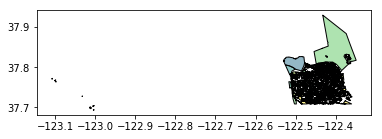

In [137]:
hu16.plot()

In [138]:
%matplotlib inline

In [139]:
hu16 = hu16.drop(['HOUSING10','POP10','NET_CHANGE','GEOID10'],axis = 1)

In [140]:
hu16.to_file('E:/Transit-Casa-Alex/Input/Population and Housing Units (Blocks)/2016/Houses_Blocks.shp',driver = 'ESRI Shapefile')

ValueError: Null layer

In [141]:
hu16_geo = gp.GeoDataFrame(columns =hu16.columns,crs = hu16.crs)

In [142]:
for column in hu16.columns:
        hu16_geo[column] = hu16[column]

In [143]:
hu16_geo.head()

,BLOCKCE,BLOCKID10,COUNTYFP10,PARTFLG,STATEFP10,TRACTCE10,geometry,HOUSING16
0,3028,6.075031e+13,075,N,06,031302,"POLYGON ((-122.469306 37.712526, -122.468748 3...",32.0
1,6025,6.075026e+13,075,N,06,025500,"POLYGON ((-122.442387 37.725793, -122.443066 3...",1.0
2,1010,6.075026e+13,075,N,06,026100,"POLYGON ((-122.439127 37.720972, -122.439382 3...",64.0
3,1001,6.075020e+13,075,N,06,020100,"POLYGON ((-122.418618 37.773053, -122.418855 3...",0.0
4,2006,6.075018e+13,075,N,06,017802,"POLYGON ((-122.413587 37.77466, -122.413161 37...",161.0


In [147]:
hu16_geo.to_file('E:/Transit-Casa-Alex/Output/Housing Units/2016/SF_Housing.shp',driver = 'ESRI Shapefile')